## ClassifyAnything Part 3-1: Logistic Regression

_Supervised learning for classification_

Logistic Regression is a supervised learning algorithm used for binary classification tasks, where the goal is to predict the probability of an input belonging to one of two classes (e.g., Yes/No, True/False, 0/1). Despite its name, logistic regression is a classification algorithm, not a regression algorithm.

The key idea behind logistic regression is to model the relationship between the input features and the binary target variable using a logistic function (sigmoid function). The sigmoid function maps any real-valued number to a value between 0 and 1, which represents the probability of the input belonging to the positive class.

Mathematically, the logistic regression model can be represented as follows:

$$ P(y=1 \,|\, x) = \frac{1}{1 + e^{-z}} $$

where:
- $ P(y=1 \,|\, x) $ is the probability of the input $ x $ belonging to the positive class (class 1).
- $ z $ is the linear combination of the input features $ x $ and their corresponding weights $ w $ plus a bias term $ b $: $ z = w_1x_1 + w_2x_2 + \ldots + w_mx_m + b $.
- $ e $ is the base of the natural logarithm.

During the training phase, logistic regression aims to find the optimal values of the weights $ w $ and bias $ b $ that best fit the training data. This is typically done by minimizing a loss function, such as the binary cross-entropy, using optimization techniques like gradient descent.

Once the model is trained, it can be used to make predictions on new data by computing the probability using the logistic function and applying a threshold (e.g., 0.5) to classify the input as either the positive class or the negative class.

Logistic regression is a straightforward and interpretable algorithm that works well for linearly separable data and can provide probabilistic predictions, making it useful for many binary classification tasks.

### 3-1.1 Import data

In [10]:
# import packages
from sklearn.model_selection import GridSearchCV
import pickle
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

with open("outputs/03_Variables.pkl", 'rb') as file:
    (X_train, X_test, y_train, y_test, kfold) = pickle.load(file)

### 3-1.2 Train the model with cross-validation

In [11]:
# Define the hyperparameter grid for logistic regression. For example, you can tune the C parameter, which controls the regularization strength.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 50, 100]}

# Create an instance of logistic regression and the GridSearchCV object:
logistic_model = LogisticRegression(max_iter=1000, multi_class='auto')
grid_search = GridSearchCV(logistic_model, param_grid, cv=kfold)

grid_search.fit(X_train, y_train)
# Retrieve the best hyperparameters and best model:
best_c = grid_search.best_params_['C']
best_model = grid_search.best_estimator_
# Print the best hyperparameter value:
print("Best C parameter:", best_c)

Best C parameter: 10


### 3-1.3 Visualize fine-tuning of hyperparameters

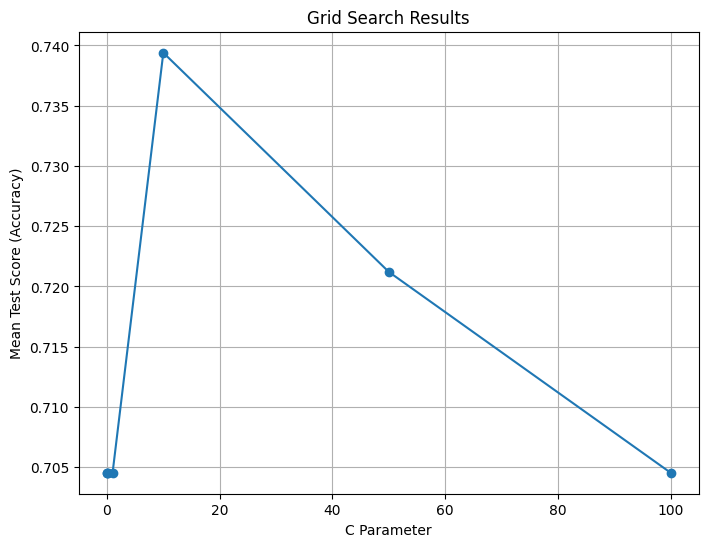

In [12]:
# Get the results of the grid search
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']
param_values = [param['C'] for param in params]

# Plot the grid search results
plt.figure(figsize=(8, 6))
plt.plot(param_values, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('C Parameter')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results')
plt.grid(True)
plt.show()

### 3-1.4 Save the model

In [13]:
import joblib
# Save the final trained model to a file
joblib.dump(best_model, 'outputs/03-1_Logistic_Regression_final_model.joblib')

['outputs/03-1_Logistic_Regression_final_model.joblib']